# 1.Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 2.Load the CSV File

In [2]:
df = pd.read_csv("/content/scores_data.csv")
df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


# 3.Understand the Dataset Structure

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [4]:
df.describe(include="all")


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


# 4.Data Cleaning

In [8]:
df.columns = ["Batch", "User_ID", "Score"]
df["Score"] = df["Score"].astype(str).str.extract(r"(\d+)").astype(int)
df.head()




,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


# 5.Check Missing Values

In [9]:
df.isnull().sum()


,0
Batch,0
User_ID,0
Score,0


# 6.Unique Batches

In [10]:
df["Batch"].unique()


array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

# 7.Number of Students per Batch

In [11]:
df["Batch"].value_counts()


,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


# 8.Batch-wise Statistical Summary

In [12]:
batch_summary = df.groupby("Batch")["Score"].agg(
    Students="count",
    Mean="mean",
    Median="median",
    Min="min",
    Max="max"
).reset_index()

batch_summary


,Batch,Students,Mean,Median,Min,Max
0,AI_ELITE_4,48,3.791667,4.0,0,7
1,AI_ELITE_6,48,4.229167,4.0,0,7
2,AI_ELITE_7,53,5.056604,5.0,2,7


# 9.Score Distribution per Batch (Histogram)

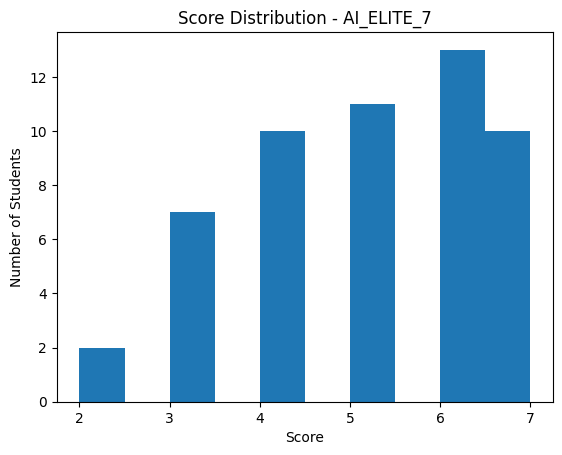

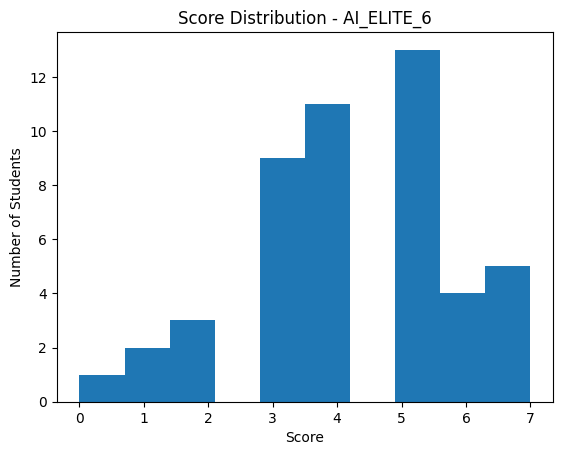

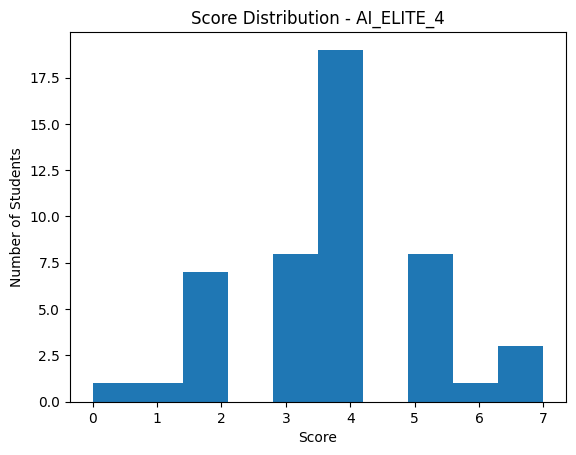

In [13]:
for batch in df["Batch"].unique():
    plt.figure()
    plt.hist(df[df["Batch"] == batch]["Score"])
    plt.title(f"Score Distribution - {batch}")
    plt.xlabel("Score")
    plt.ylabel("Number of Students")
    plt.show()


# 10.Boxplot for Batch Comparison

<Figure size 640x480 with 0 Axes>

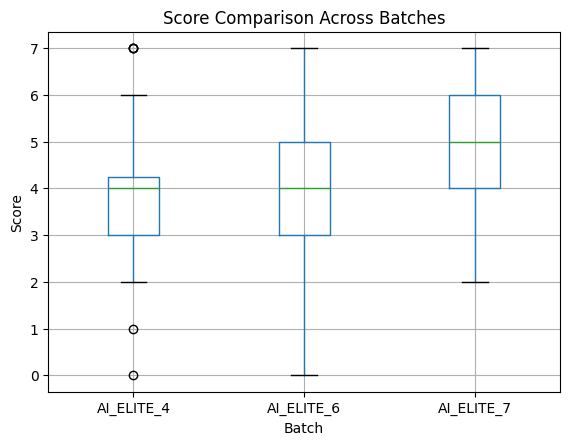

In [14]:
plt.figure()
df.boxplot(column="Score", by="Batch")
plt.title("Score Comparison Across Batches")
plt.suptitle("")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()


# 11.Mean Score Comparison (Bar Chart)

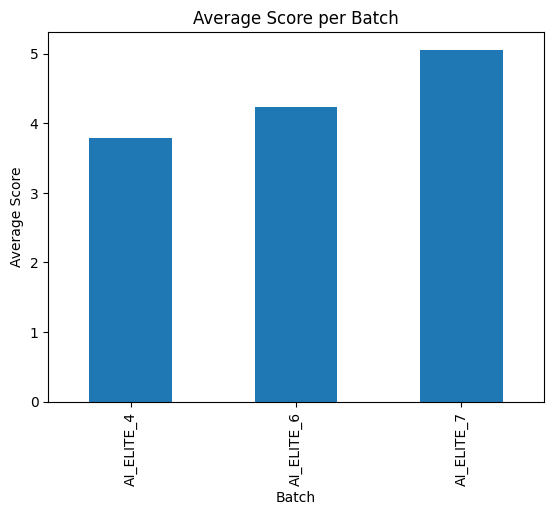

In [15]:
mean_scores = df.groupby("Batch")["Score"].mean()

plt.figure()
mean_scores.plot(kind="bar")
plt.title("Average Score per Batch")
plt.xlabel("Batch")
plt.ylabel("Average Score")
plt.show()


# 12.Identify High & Low Performers

In [16]:
high_performers = df[df["Score"] >= 6]
low_performers = df[df["Score"] <= 2]

print("High Performers Count:\n", high_performers["Batch"].value_counts())
print("\nLow Performers Count:\n", low_performers["Batch"].value_counts())


High Performers Count:
 Batch
AI_ELITE_7    23
AI_ELITE_6     9
AI_ELITE_4     4
Name: count, dtype: int64

Low Performers Count:
 Batch
AI_ELITE_4    9
AI_ELITE_6    6
AI_ELITE_7    2
Name: count, dtype: int64


# 13.Key Insights (Markdown Cell)

### Key Insights:
- AI_ELITE_7 has the highest average and median score.
- AI_ELITE_4 shows lower overall performance with more low scorers.
- All batches have students achieving the maximum score of 7.
- AI_ELITE_7 shows better consistency with fewer very low scores.
